In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn import datasets

### Decreases the accuracy of KNN classifier when incrementing the number of features?
Yes

In [10]:
# loading data
feature_set = np.logspace(1,3)
accuracies = []
results_avg = []
results_std = []

for n_features in feature_set:
    X, y = datasets.make_classification(n_classes=2, n_features= int(n_features))
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
    skf = StratifiedKFold(y, n_folds = 4)
    knn = KNeighborsClassifier()
    for train_index, test_index in skf:
        knn.fit(X[train_index], y[train_index])
        accuracies.append(accuracy_score(y[test_index], knn.predict(X[test_index])))
    results_avg.append(np.average(accuracies))
    results_std.append(np.std(accuracies))

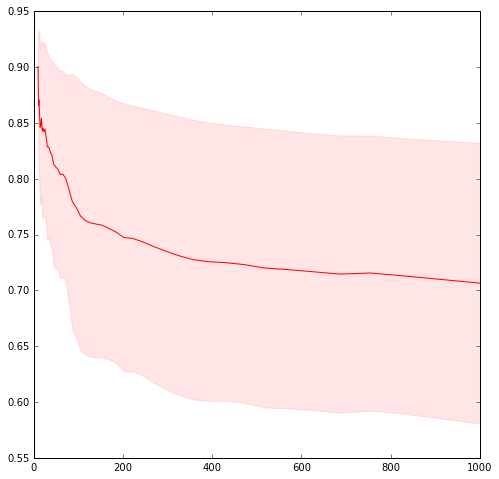

In [12]:
plt.figure(figsize=(8,8))
plt.plot(feature_set, results_avg, color = "r")
plt.fill_between(feature_set, np.asarray(results_avg) - np.asarray(results_std),
                     np.asarray(results_avg) + np.asarray(results_std), alpha=0.1,
                     color="r")
plt.show()

#### Checked